### import modules 

In [1]:
# import modules of interest 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import mnist
import pylab
import copy

sns.set()

# setup jupyter notebook 
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### define functions for code

In [136]:

# data loading function
def load_dataset():
    mndata = mnist.MNIST('./python-mnist/data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    
    labels_train = labels_train.astype('int')
    labels_test = labels_test.astype('int')
    return X_train, X_test,labels_train,labels_test

# extract the 2's and 7's, conver to -1 and 1 values 
def convert_2_7(x_train,x_test,labels_train,labels_test):
    #import pdb; pdb.set_trace()
    mask_train = np.logical_or(labels_train==2,labels_train==7)
    mask_test = np.logical_or(labels_test==2,labels_test==7)
   # mask_train = labels_train==2 or labels_train==7
    #mask_test = labels_test==2 or labels_test==7
    
    x_train_c = x_train[mask_train]
    x_test_c = x_test[mask_test]
    

    labels_train_c = labels_train[mask_train]
    labels_test_c = labels_test[mask_test]
    
    labels_train_c[labels_train_c==2] = -1
    labels_train_c[labels_train_c==7] = 1

    labels_test_c[labels_test_c==2] = -1
    labels_test_c[labels_test_c==7] = 1

    return x_train_c,x_test_c,labels_train_c,labels_test_c 

# implement the gradient method 
def gradient_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    #step_size = 3e-2
    step_size = 1e-1
    criteria_conv = 0.000004

    
    # do one run through first after being initialized to zero 
    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w))) 
    
    # calculate cost function on training
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)

    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classification
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)
    
    while not_conv:
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        w_vec.append(w)
        b_vec.append(b)
        
        cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part

        mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
        cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)

        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

        print('the value of j train is {}'.format(j_train))

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec

# implement stochastic gradient descent, batch_size determines how many examples are in each run. 
def SGD_old(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    #step_size = 1e-3
    step_size = 5e-2
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range = np.arange(np.shape(X)[0])
    
    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)

        inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
        X_sub = X[inds_choose,:]
        y_sub = y[inds_choose]
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))) 

        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        #g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
        g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*(batch_size/n)*lambda_val*w
        g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))

        # 
        w = w_old - step_size*g_w
        b = b_old - step_size*g_b

        cost_mu = 1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))
        j_train = (1/batch_size)*(np.sum(np.log(cost_mu))) + 2*(batch_size/n)*lambda_val*np.dot(w.T,w)
        print('the value of j train is {}'.format(j_train))

        ####### testing part

        cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

        w_vec.append(w)
        b_vec.append(b)

        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)

        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)

        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
        # check convergence
       # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
        #if k>200:
        if k>1000:    
            not_conv = False

        else:
            not_conv = True
            k += 1
            
    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


# implement newton's method 

def newton_method(X,y,X_test,y_test,lambda_val):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 1
    #step_size = 1e-3
    step_size = 1
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0

    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    #mu_vec = np.zeros((np.shape(X)[0],))
    #cost_mu = np.zeros((np.shape(X)[0],))
    #range_vec = np.arange(len(mu_vec))

    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
 
        ##### training part 
        #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
        mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w))))
        #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
        #g_b = (1/n)*np.sum(mu_vec-y)

        g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
        g_b = (1/n)*np.sum(-y*(1-mu_vec))
        
        s_vec = mu_vec*(1-mu_vec)
        diag_sigmoid = np.diag(s_vec)
        identity_lambda = np.identity(np.shape(X)[1])
        h_w = (1/n)*np.dot(X.T,np.dot(diag_sigmoid,X)) + 2*lambda_val*identity_lambda
        h_b = np.sum((1/n)*s_vec)
        
        d_k_w = np.linalg.solve(h_w,-g_w)
        #d_k_b = np.linalg.solve(h_b,-g_b)
        d_k_b = -g_b/h_b

        # 
        w = w_old + step_size*d_k_w
        b = b_old + step_size*d_k_b
        
        cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     

        j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
        ####### testing part
        cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

        j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)
                             
        k_vec.append(k)
        j_train_vec.append(j_train)
        j_test_vec.append(j_test)

        
        ###       
        w_vec.append(w)
        b_vec.append(b)
        
        #### classification
        train_signed = (b+np.dot(X,w))
        test_signed = (b+np.dot(X_test,w))

        train_data_class = np.sign(train_signed)
        test_data_class = np.sign(test_signed)

        train_classify_error_vec = [train_data_class != y]
        test_classify_error_vec = [test_data_class != y_test]

        train_classify_error = np.sum(train_classify_error_vec)/n
        test_classify_error = np.sum(test_classify_error_vec)/n_test

        train_classify_vec.append(train_classify_error)
        test_classify_vec.append(test_classify_error)
        
        print('the value of j train is {}'.format(j_train))
        
        delta_w = np.abs(w-w_old)
        delta_b = np.abs(b-b_old)
        
        #w = np.array(w)
        w_old = copy.copy(w)
        b_old = copy.copy(b)
        
        print((1/n_features)*np.sum(delta_w))
                            
        # check convergence
        if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            not_conv = False

        else:
            not_conv = True
            k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


# plot the cost fucntion and misclassification error 
def plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,titl_1):
    
    # plot the cost function vs. iteration
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,j_train_vec,label='training')
    plt.plot(k_vec,j_test_vec,label='testing')
    plt.xlabel('iteration number')
    plt.ylabel('cost function')
    plt.title(titl_1 + 'Cost function vs. iteration')
    plt.legend()
    index = np.argmin(j_train_vec)
    k_best = k_vec[index]
    w_best = w_vec[index]
    titl_1_save = titl_1[:-2]
    titl_1_save = titl_1_save.replace(" ","_")
    #plt.savefig(titl_1_save + 'cost_func')

    # plot the misclassification error vs. iteration 
    plt.figure(figsize=(4, 4), dpi=600)
    plt.plot(k_vec,train_classify_vec,label='training data')
    plt.plot(k_vec,test_classify_vec,label='test data')
    plt.xlabel('iteration number')
    plt.ylabel('misclassification error')
    plt.title(titl_1 + 'Misclassification error vs. iteration number')
    plt.legend()
    #plt.savefig(titl_1_save + 'mis_class_error')


In [145]:
# implement stochastic gradient descent, batch_size determines how many examples are in each run. 
def SGD(X,y,X_test,y_test,lambda_val,batch_size):
    not_conv = True
    j_train_vec = []
    j_test_vec = []
    w_vec = []
    b_vec = []
    k_vec = []
    train_classify_vec = []
    test_classify_vec = []

    k = 0
    step_size = 5e-3
    #step_size = 5e-2
    criteria_conv = 0.004

    w = np.zeros((np.shape(X)[1],))
    b = 0
    
    ##### gradient descent batch size choice
    batch_range = np.arange(np.shape(X)[0])
    
    n = np.shape(X)[0]
    n_features = np.shape(X)[1]
    n_test = np.shape(X_test)[0]
    
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))     
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    print('the value of j train is {}'.format(j_train))

    ####### testing part
    cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

    j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)


    ###       
    w_vec.append(w)
    b_vec.append(b)

    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]

    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n_test

    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    w_old = copy.copy(w)
    b_old = copy.copy(b)

    while not_conv:
        # stochastic choice
        np.random.shuffle(batch_range)
        for i in np.arange(n/batch_size): 
            inds_choose = batch_range[int(i*batch_size):(int(i*batch_size)+int(batch_size))]
            #inds_choose = np.random.choice(batch_range,size=batch_size,replace=False)
            X_sub = X[inds_choose,:]
            y_sub = y[inds_choose]
            ##### training part 
            #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
            #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
            mu_vec = 1/(1+np.exp(-y_sub.T*(b+np.dot(X_sub,w)))) 

            #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
            #g_b = (1/n)*np.sum(mu_vec-y)

            #g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*lambda_val*w
            g_w = (1/batch_size)*(np.dot(X_sub.T,(-y_sub*(1-mu_vec)))) + 2*(batch_size/n)*lambda_val*w
            g_b = (1/batch_size)*np.sum(-y_sub*(1-mu_vec))

            # 
            w = w_old - step_size*g_w
            b = b_old - step_size*g_b
            
            
            #w = np.array(w)
            w_old = copy.copy(w)
            b_old = copy.copy(b)
            
            delta_w = np.abs(w-w_old)
            delta_b = np.abs(b-b_old)

            cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
            j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
            #print('the value of j train is {}'.format(j_train))

            ####### testing part

            cost_mu_test = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))

            j_test = (1/n_test)*(np.sum(np.log(cost_mu_test))) + lambda_val*np.dot(w.T,w)

            w_vec.append(w)
            b_vec.append(b)

            k_vec.append(k)
            j_train_vec.append(j_train)
            j_test_vec.append(j_test)

            #### classification
            train_signed = (b+np.dot(X,w))
            test_signed = (b+np.dot(X_test,w))

            train_data_class = np.sign(train_signed)
            test_data_class = np.sign(test_signed)

            train_classify_error_vec = [train_data_class != y]
            test_classify_error_vec = [test_data_class != y_test]

            train_classify_error = np.sum(train_classify_error_vec)/n
            test_classify_error = np.sum(test_classify_error_vec)/n_test

            train_classify_vec.append(train_classify_error)
            test_classify_vec.append(test_classify_error)


            # check convergence
           # if ((1/n_features)*np.sum(delta_w))<criteria_conv and k>1:
            if k>100:
            #if k>3000:    
                not_conv = False
                return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec


            else:
                not_conv = True
                k += 1

    return j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec



### Load and convert data 

In [4]:
x_train,x_test,labels_train,labels_test = load_dataset()

In [5]:
x_train_c,x_test_c,labels_train_c,labels_test_c  = convert_2_7(x_train,x_test,labels_train,labels_test)

In [6]:
lambda_val = 10**-1

### gradient descent method 

In [137]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = gradient_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.5379555166429864
the value of j train is 0.4472268515049206
the value of j train is 0.39070184811740516
the value of j train is 0.3533361169308339
the value of j train is 0.32738180651589016
the value of j train is 0.3086331548066261
the value of j train is 0.29466433413571613
the value of j train is 0.2839967386619997
the value of j train is 0.27568558014479905
the value of j train is 0.2691027308321599
the value of j train is 0.263816424545151
the value of j train is 0.25952138358024573
the value of j train is 0.25599651793376227
the value of j train is 0.25307837506806935
the value of j train is 0.25064394171642035
the value of j train is 0.24859919123269736
the value of j train is 0.24687126889723982
the value of j train is 0.24540304321891648
the value of j train is 0.24414923317991896
the value of j train is 0.24307360787433324
the value of j train is 0.24214693006104965
the value of j train is 0.241345424812854

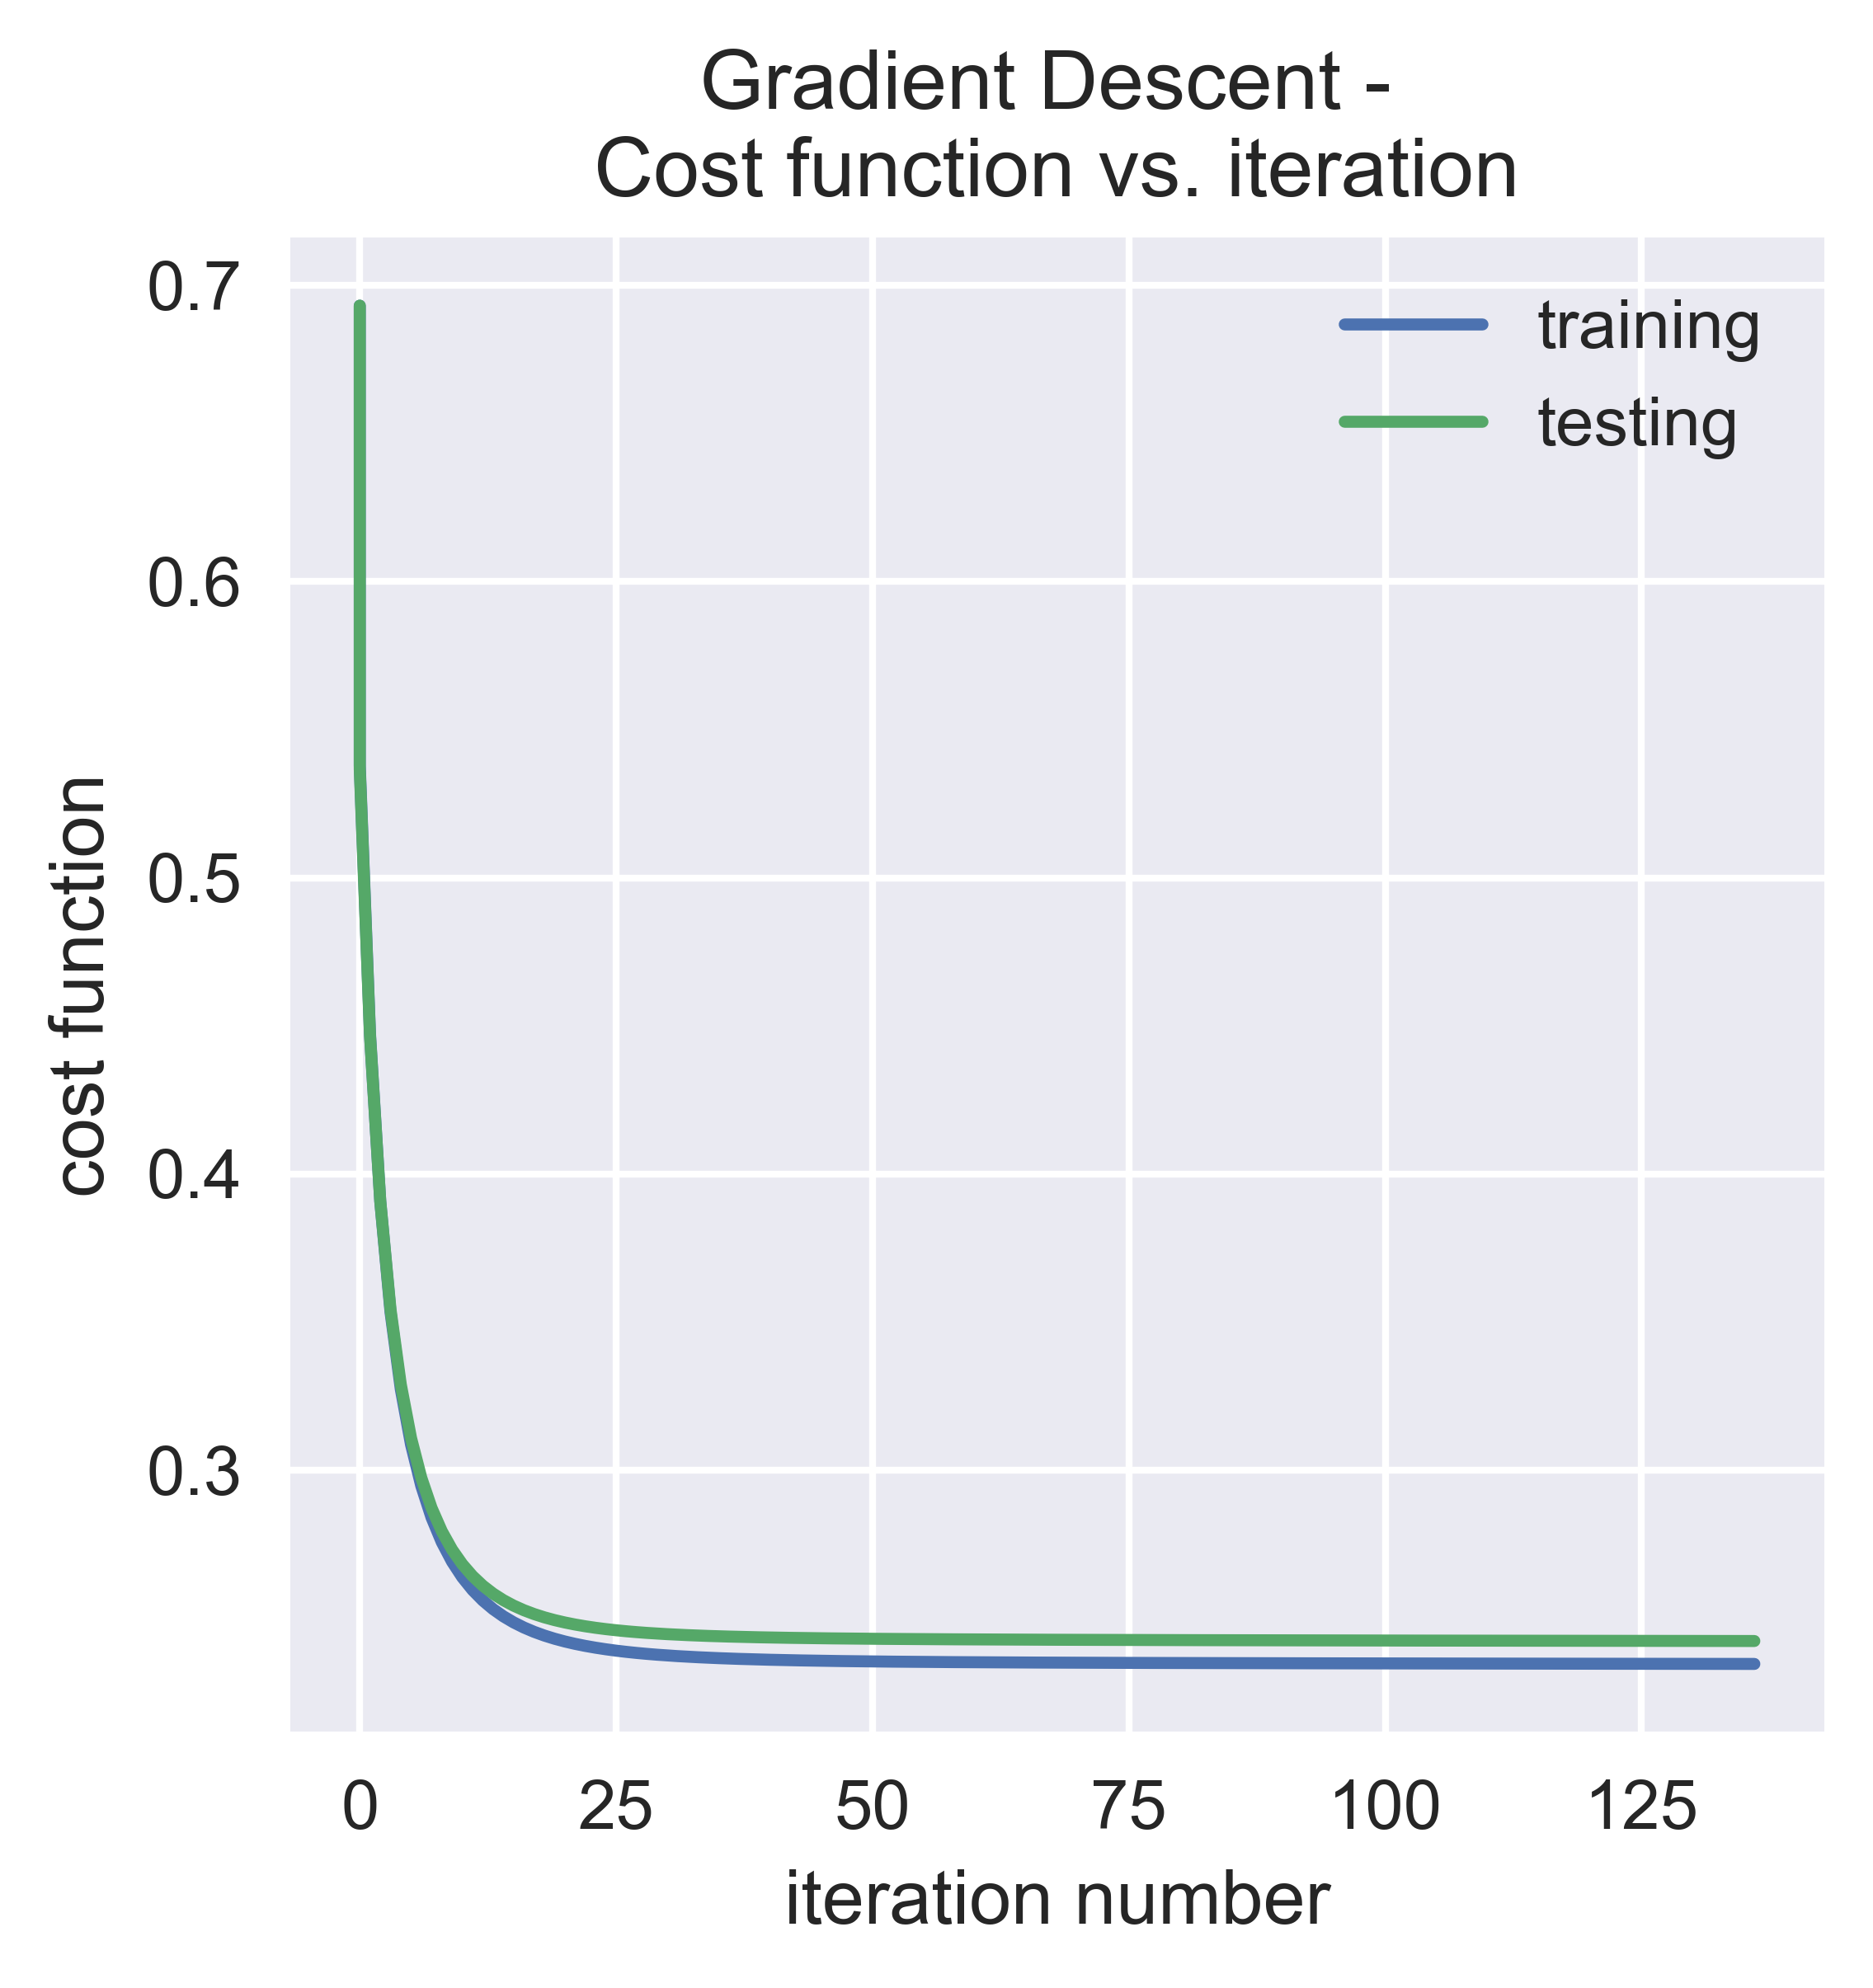

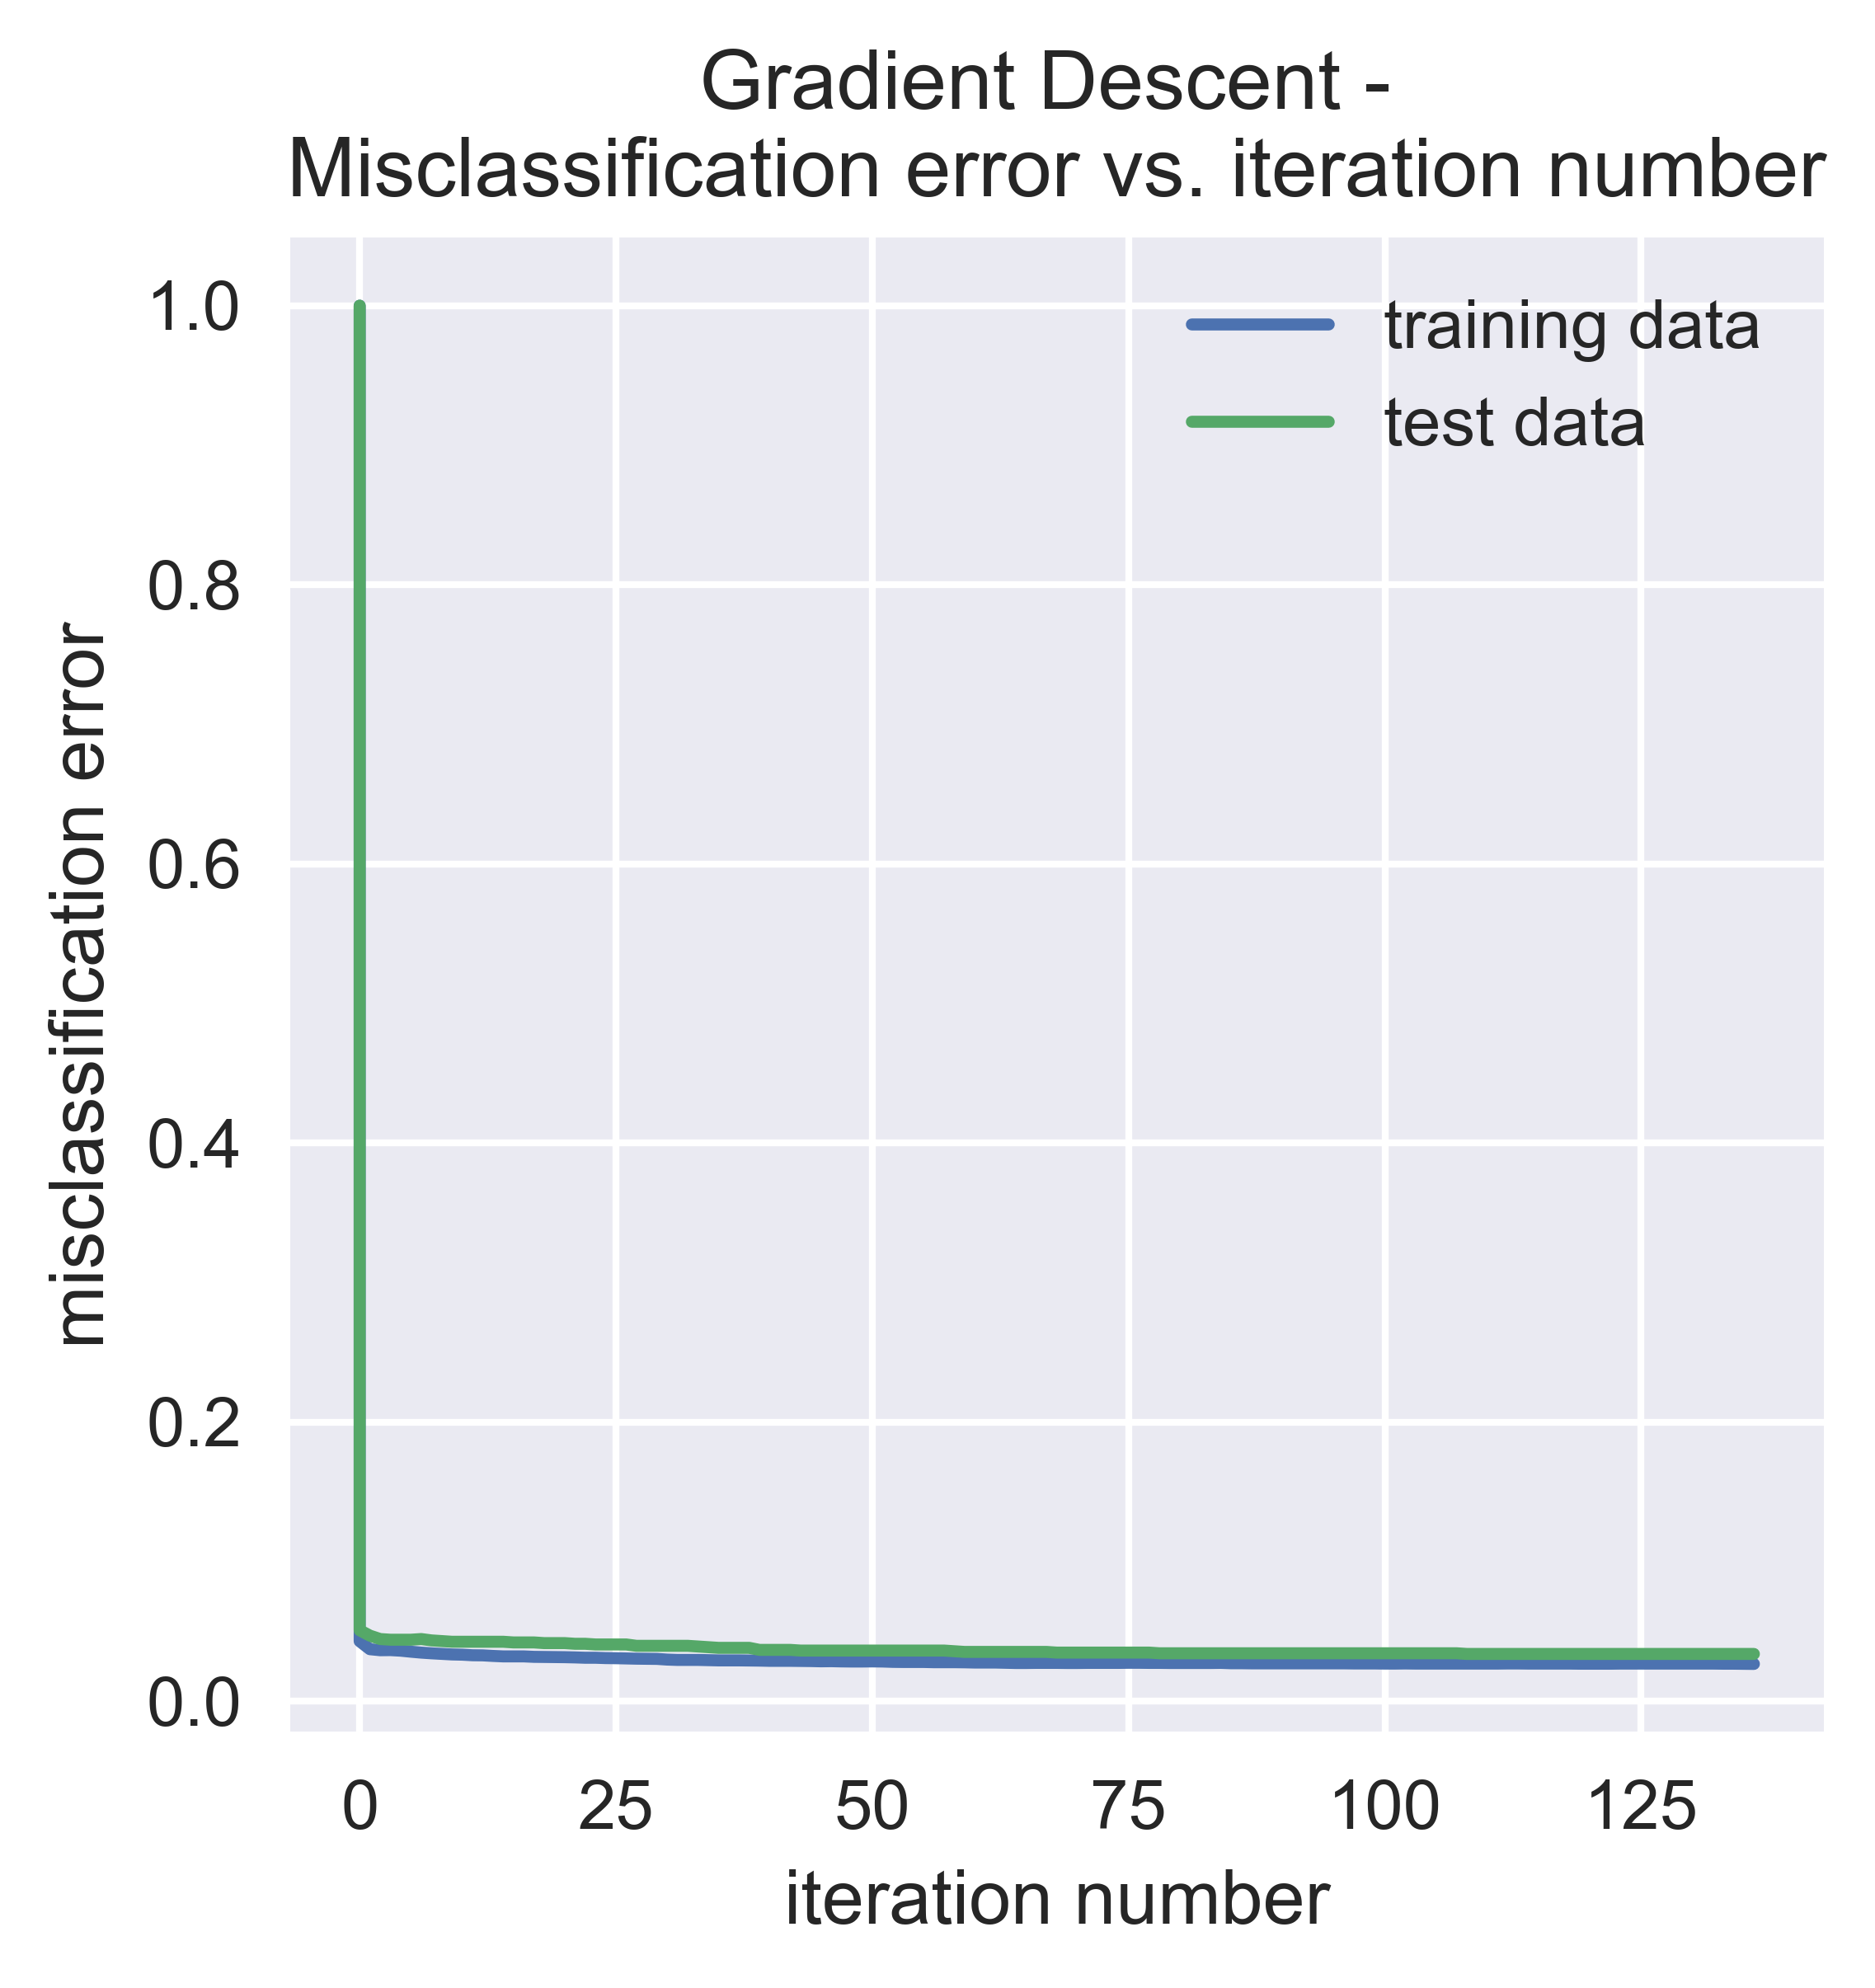

In [138]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Gradient Descent - \n')

### stochastic gradient descent - 1 example

In [146]:
batch_size = 1
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452


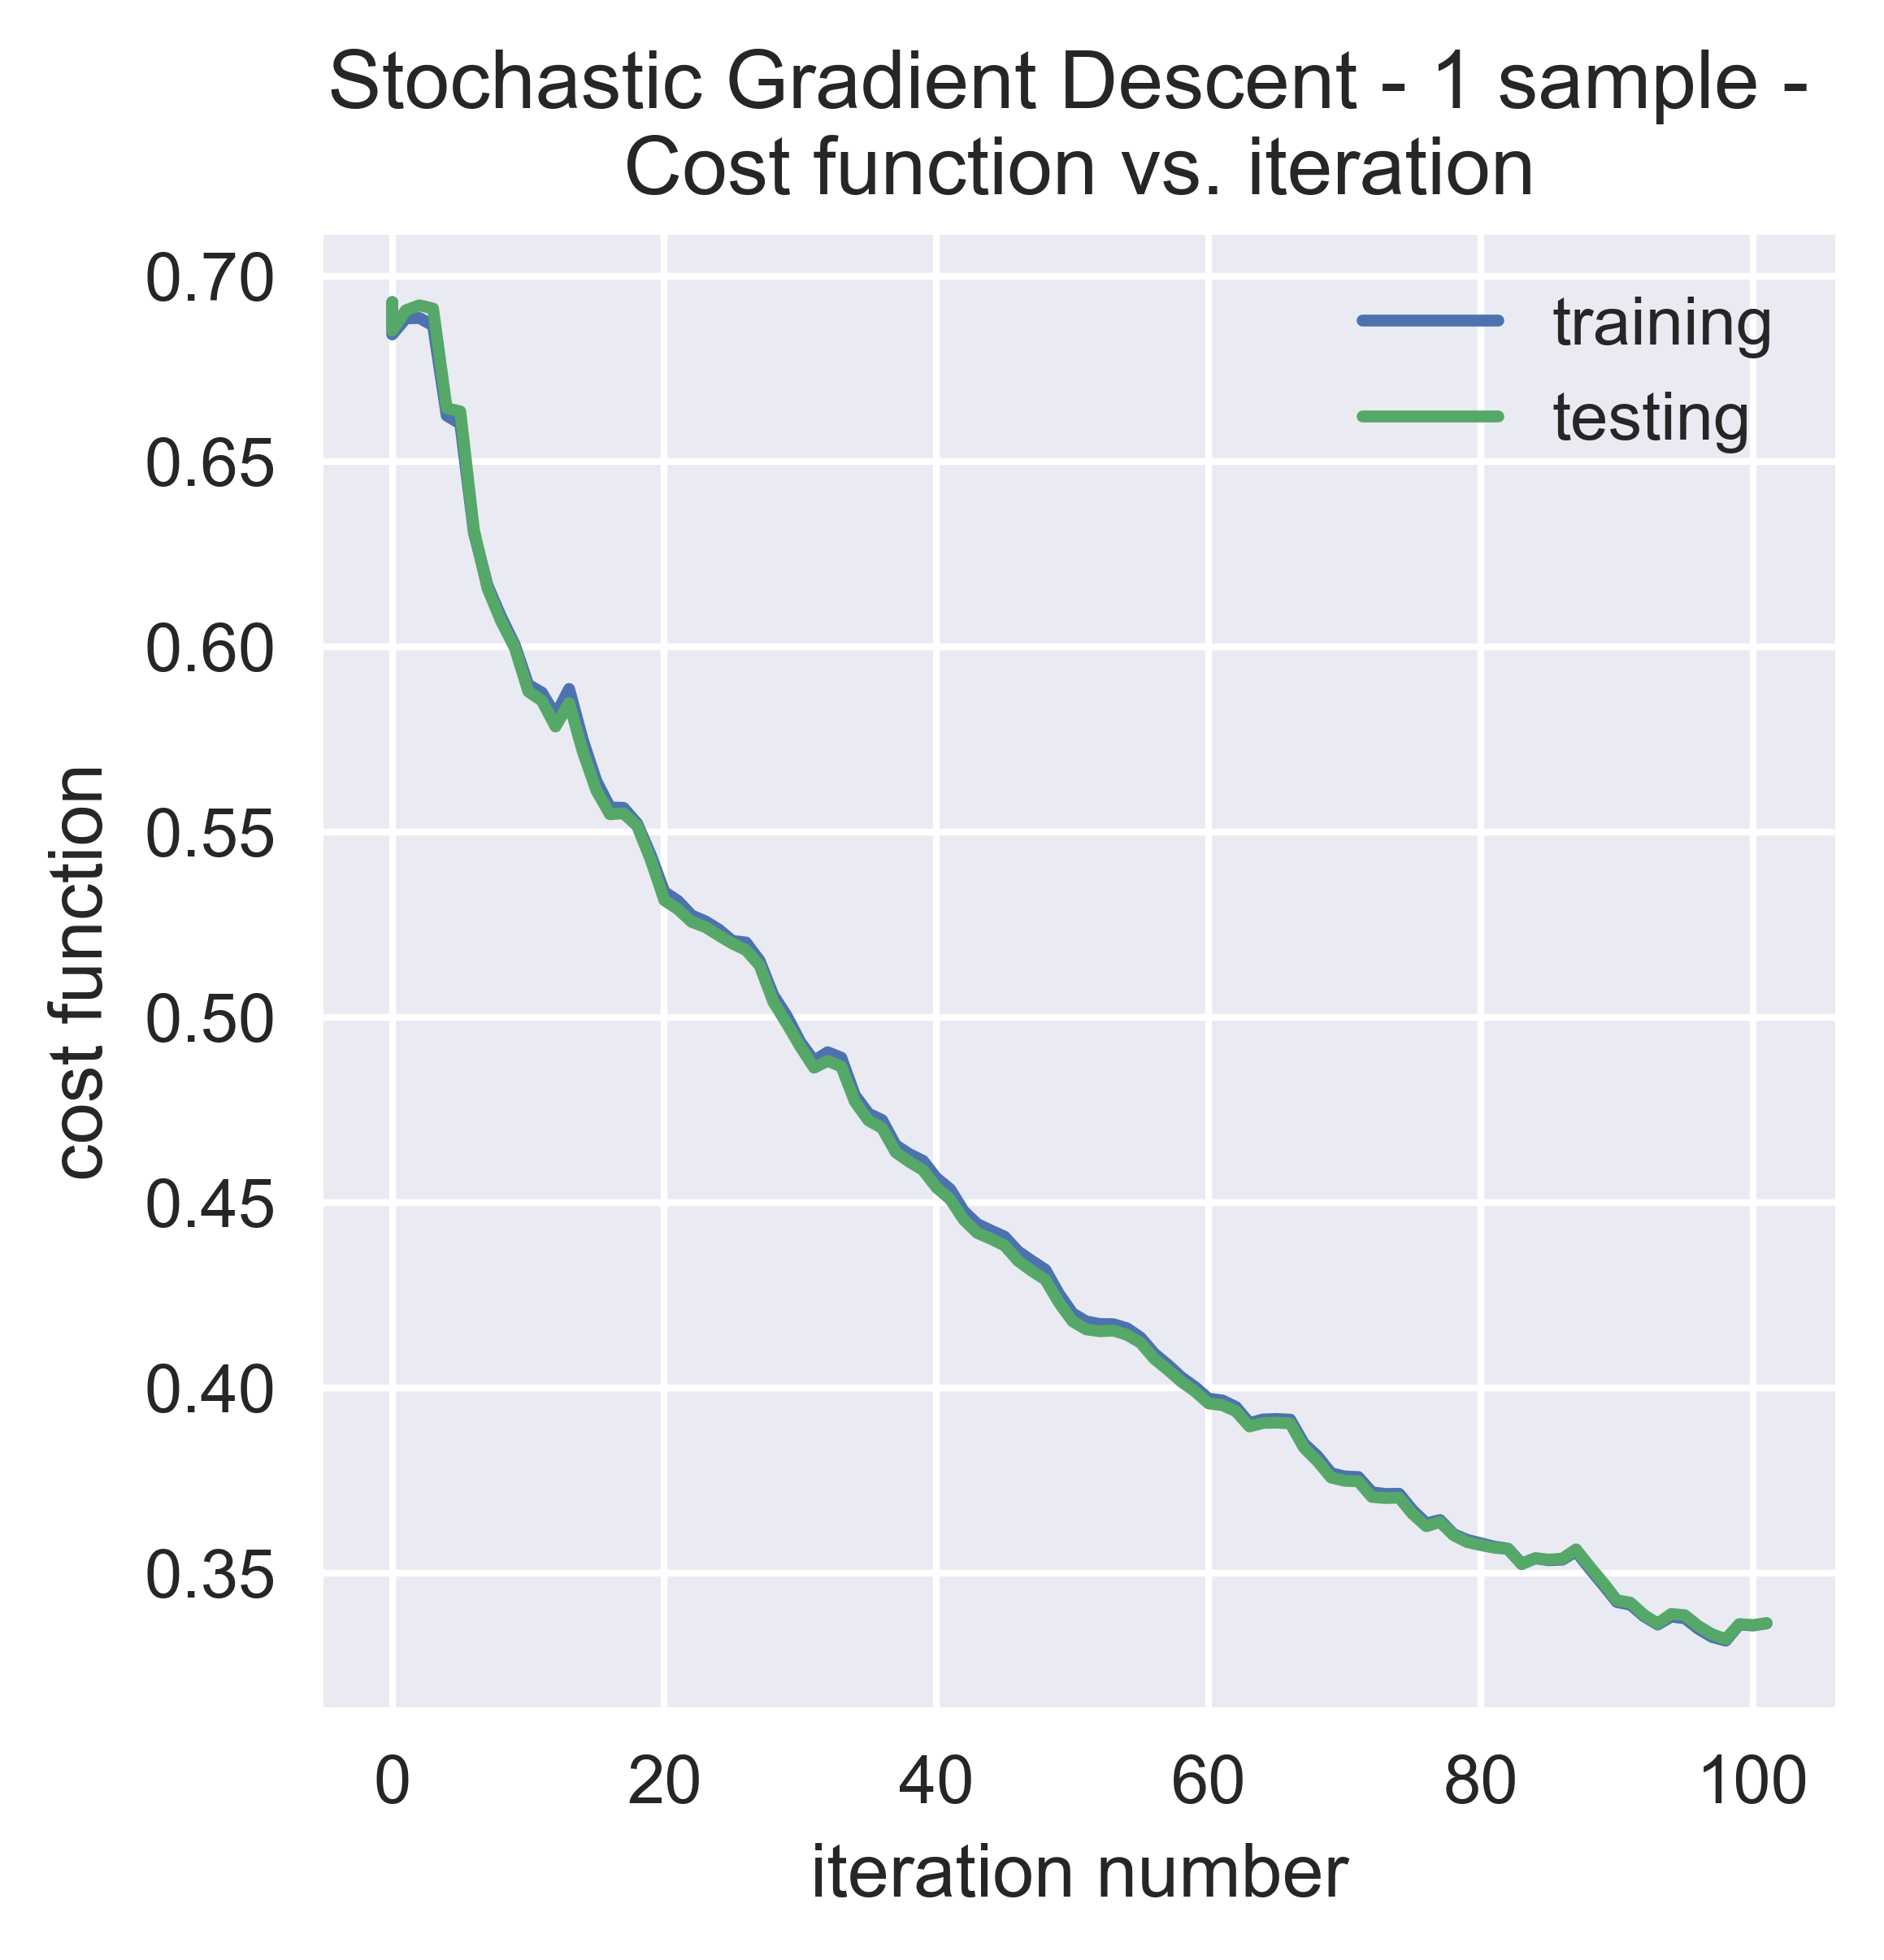

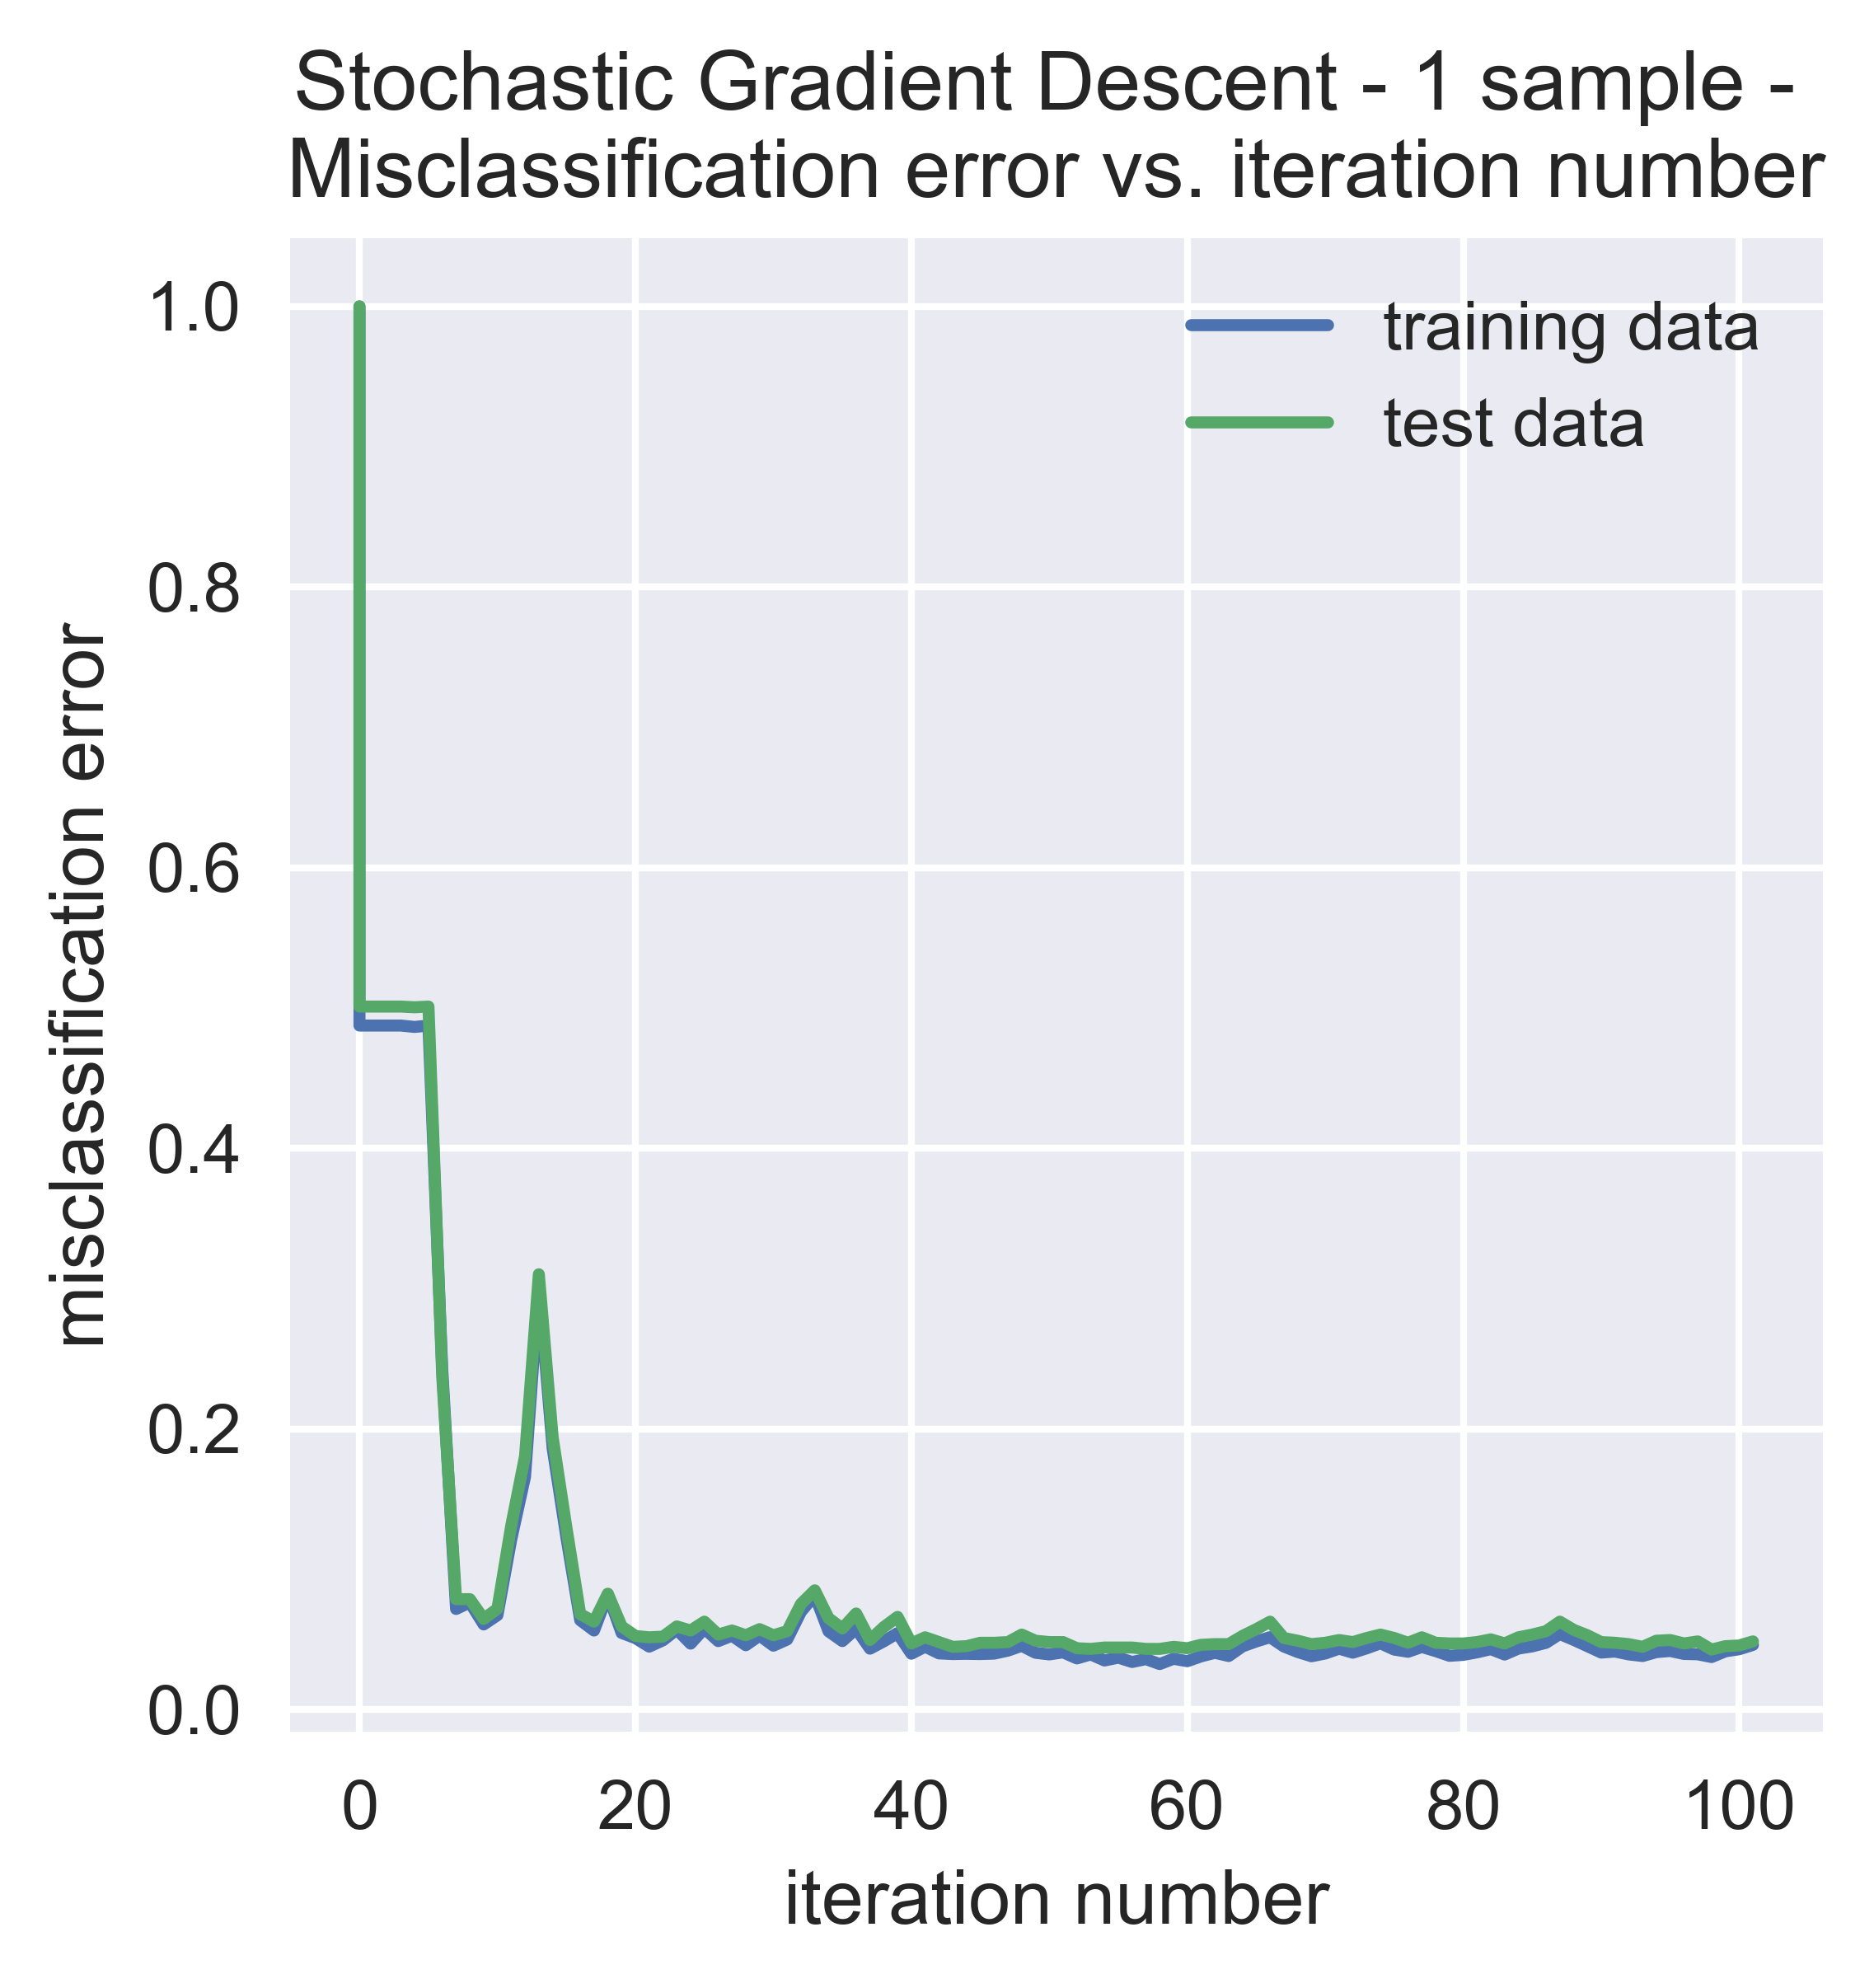

In [147]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 1 sample - \n')

### stochastic gradient descent - batch size 100

In [148]:
batch_size = 100 
#batch_size = 12223
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = SGD(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val,batch_size)

the value of j train is 0.6931471805599452


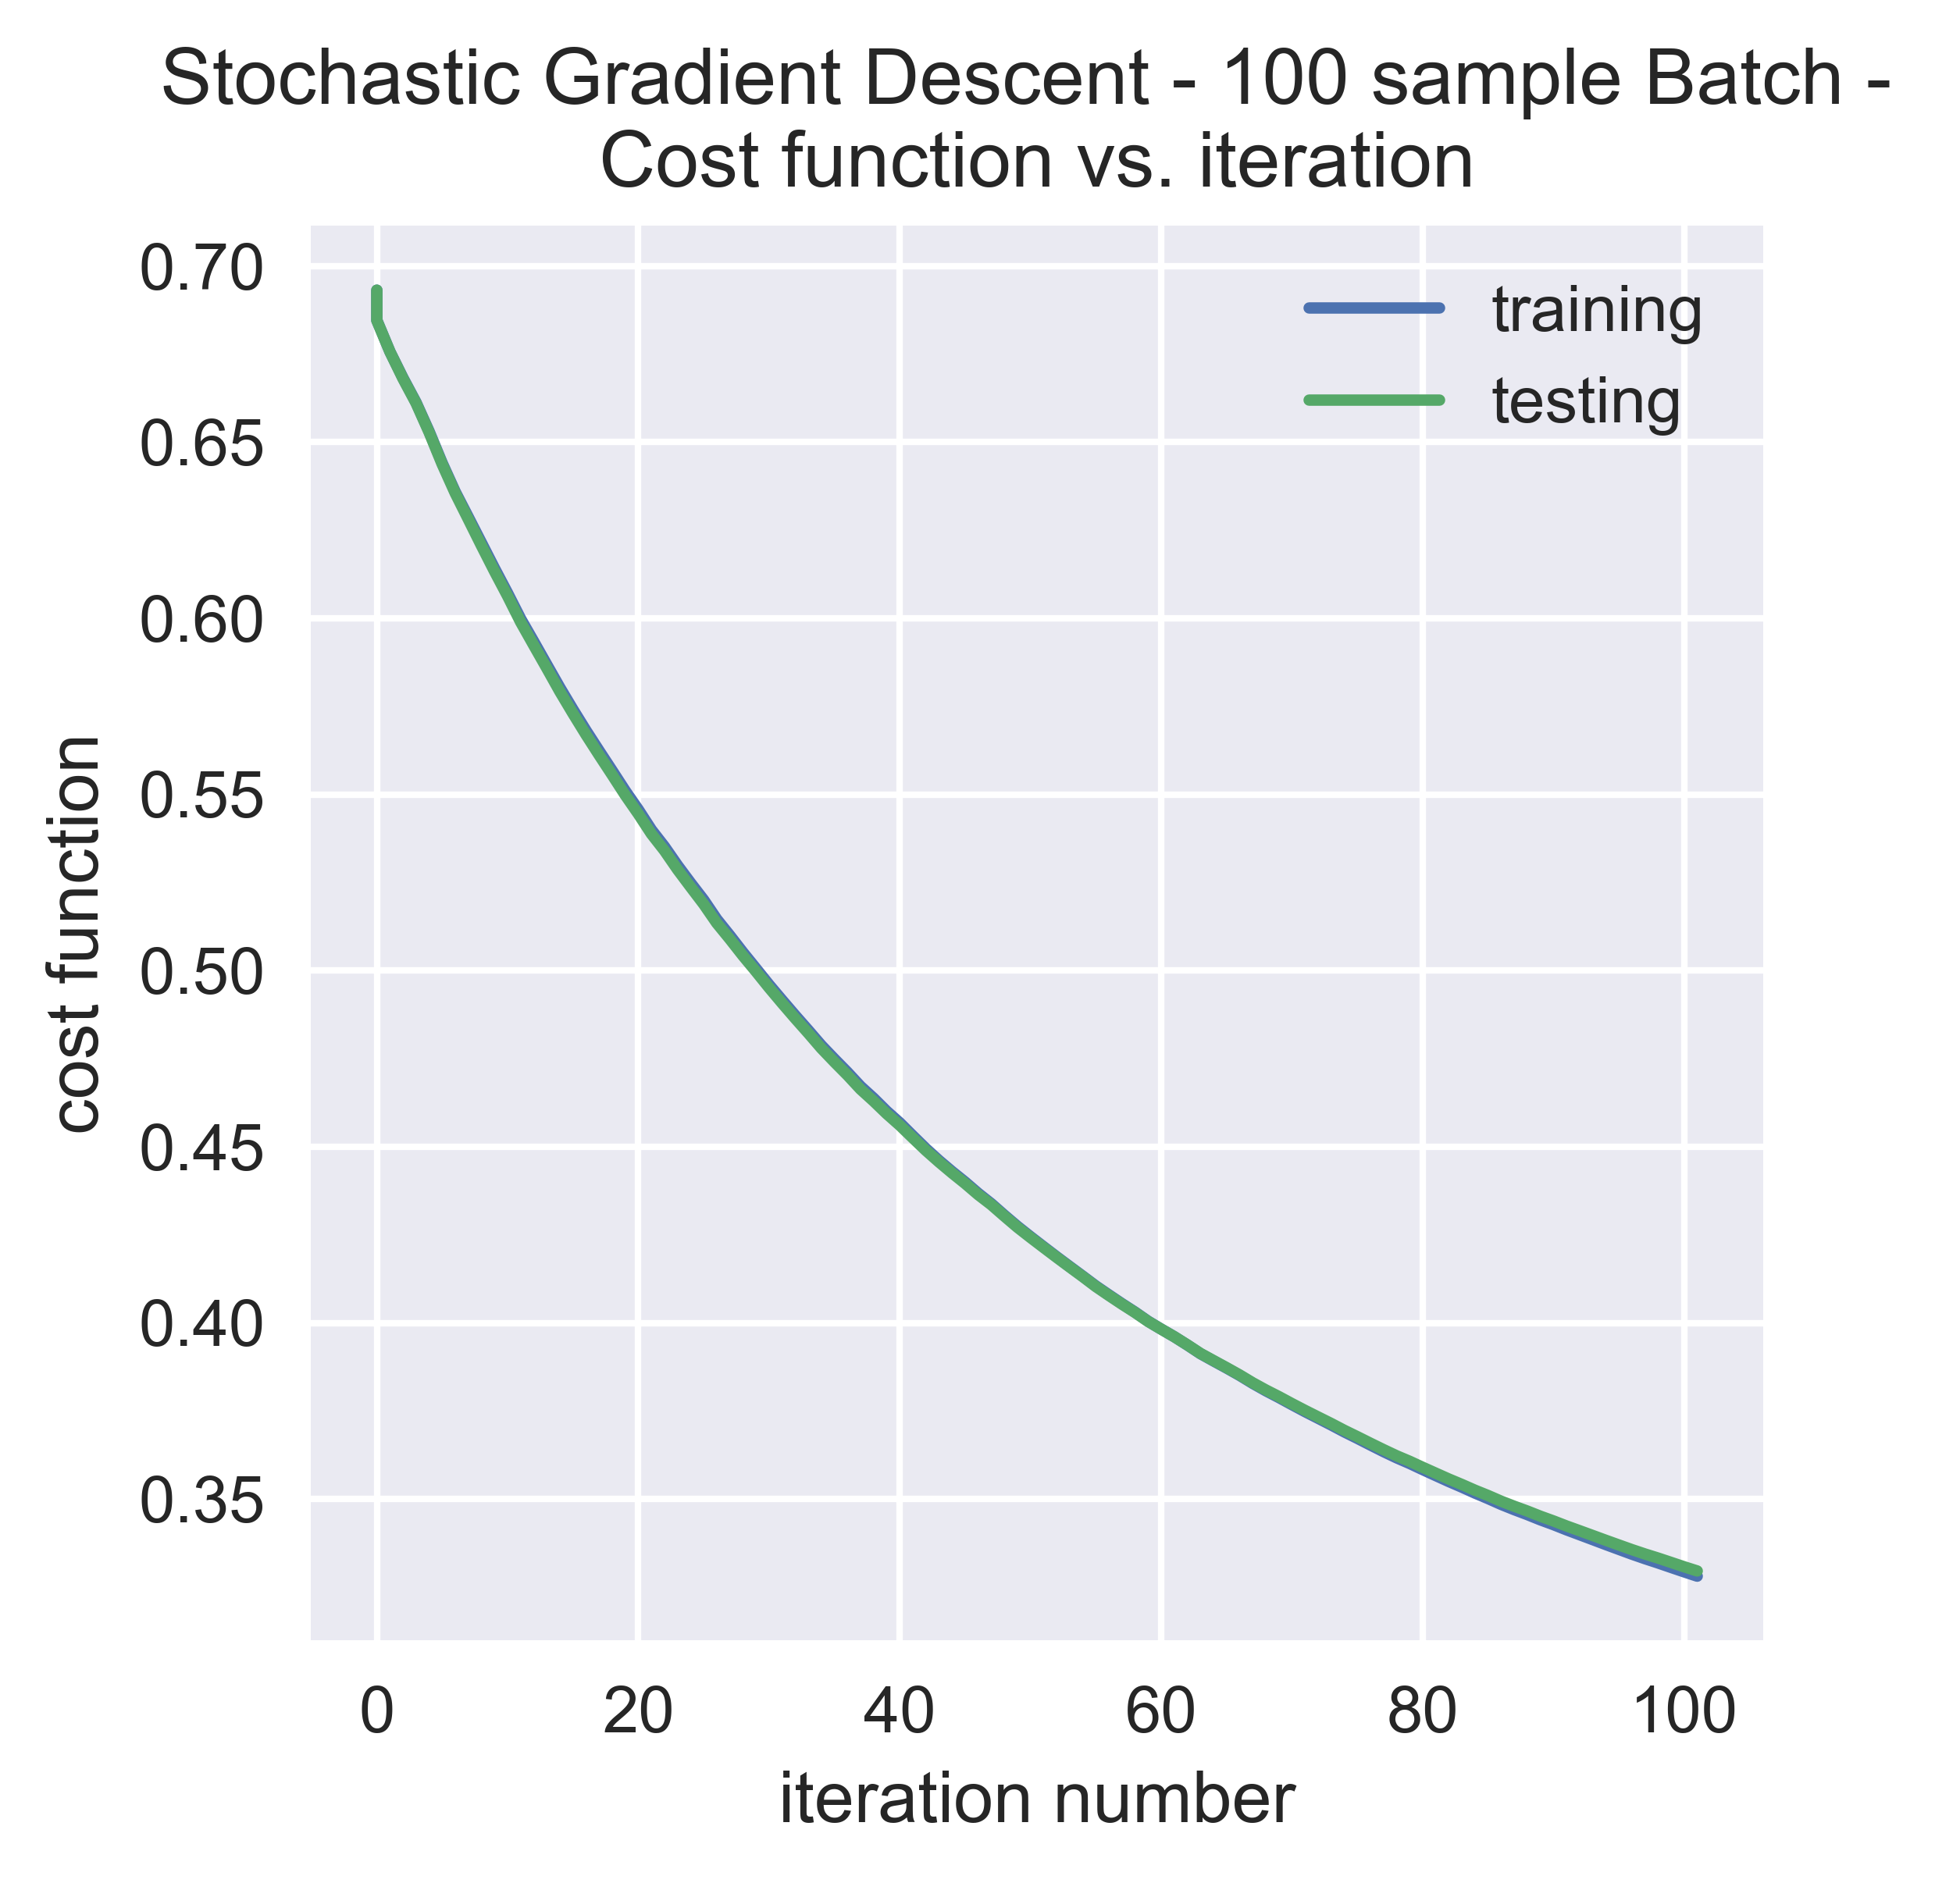

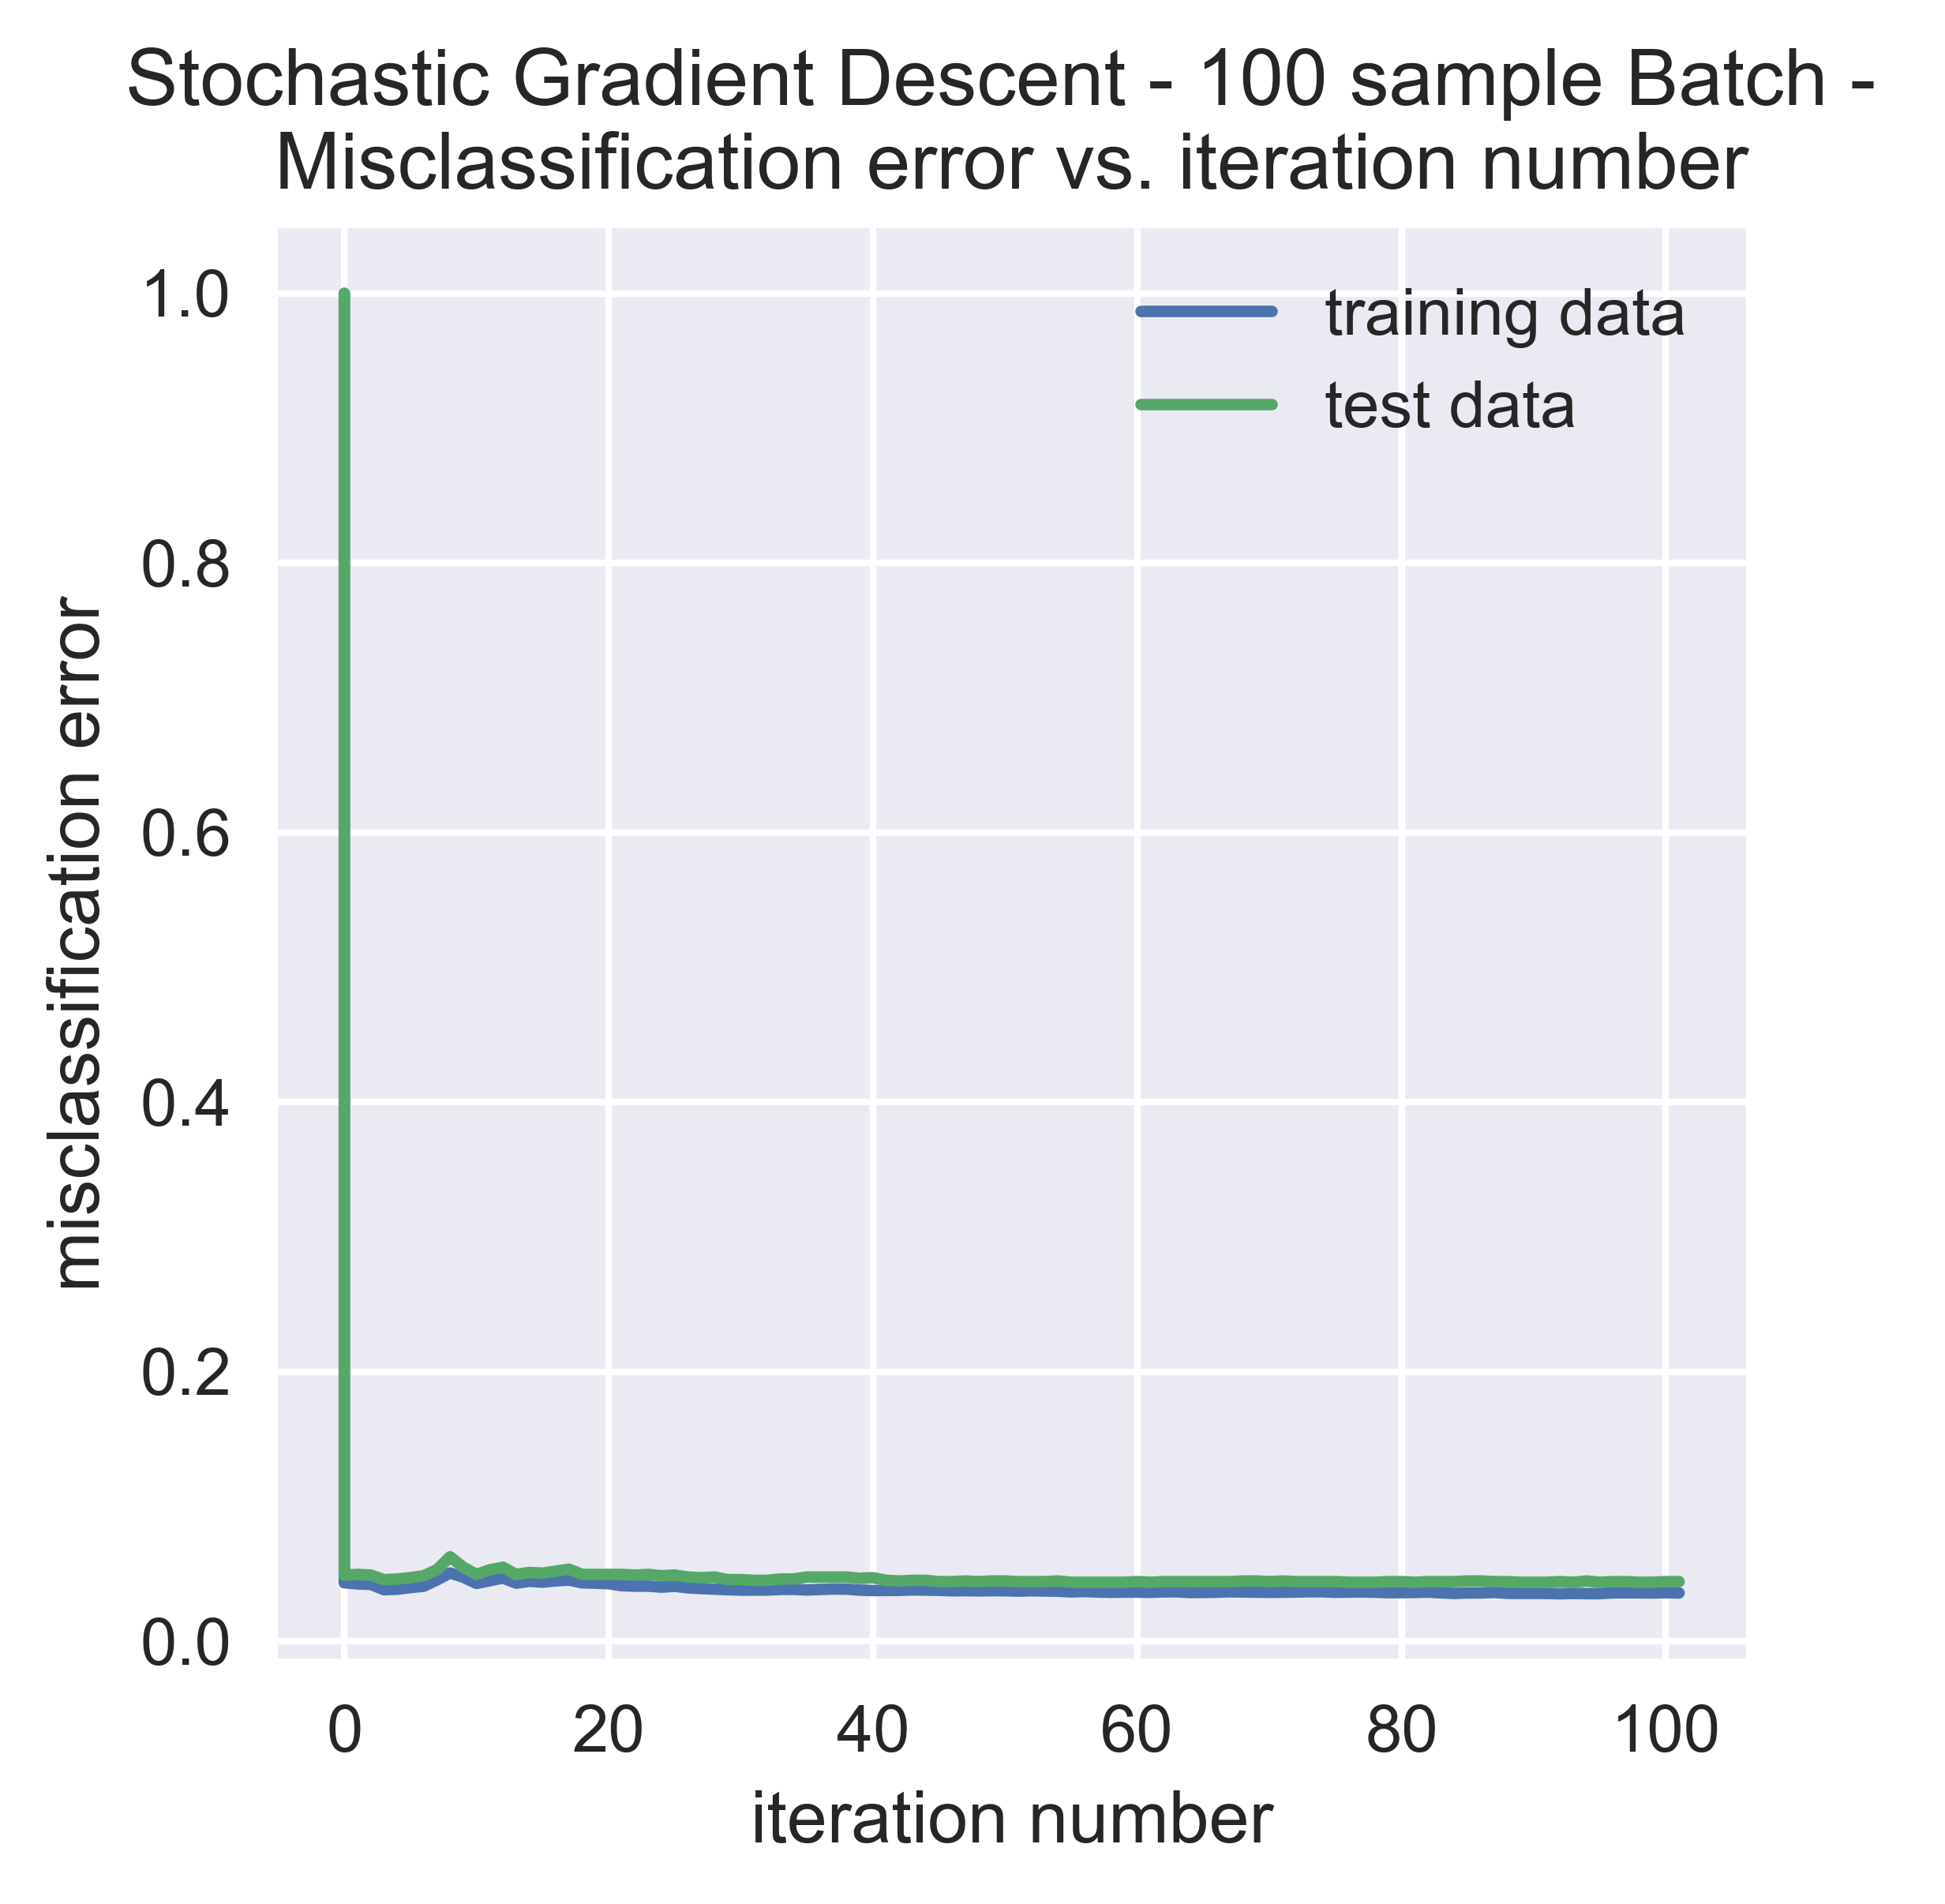

In [149]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Stochastic Gradient Descent - 100 sample Batch - \n')

### newton's method 

In [48]:
j_train_vec,j_test_vec,w_vec,b_vec,k_vec,test_classify_vec,train_classify_vec = newton_method(x_train_c,labels_train_c,x_test_c,labels_test_c,lambda_val)

the value of j train is 0.6931471805599452
the value of j train is 0.2770841950644773
0.0134271437518
the value of j train is 0.23766775727977937
0.0052461701467
the value of j train is 0.23487475169931332
0.00173836919585


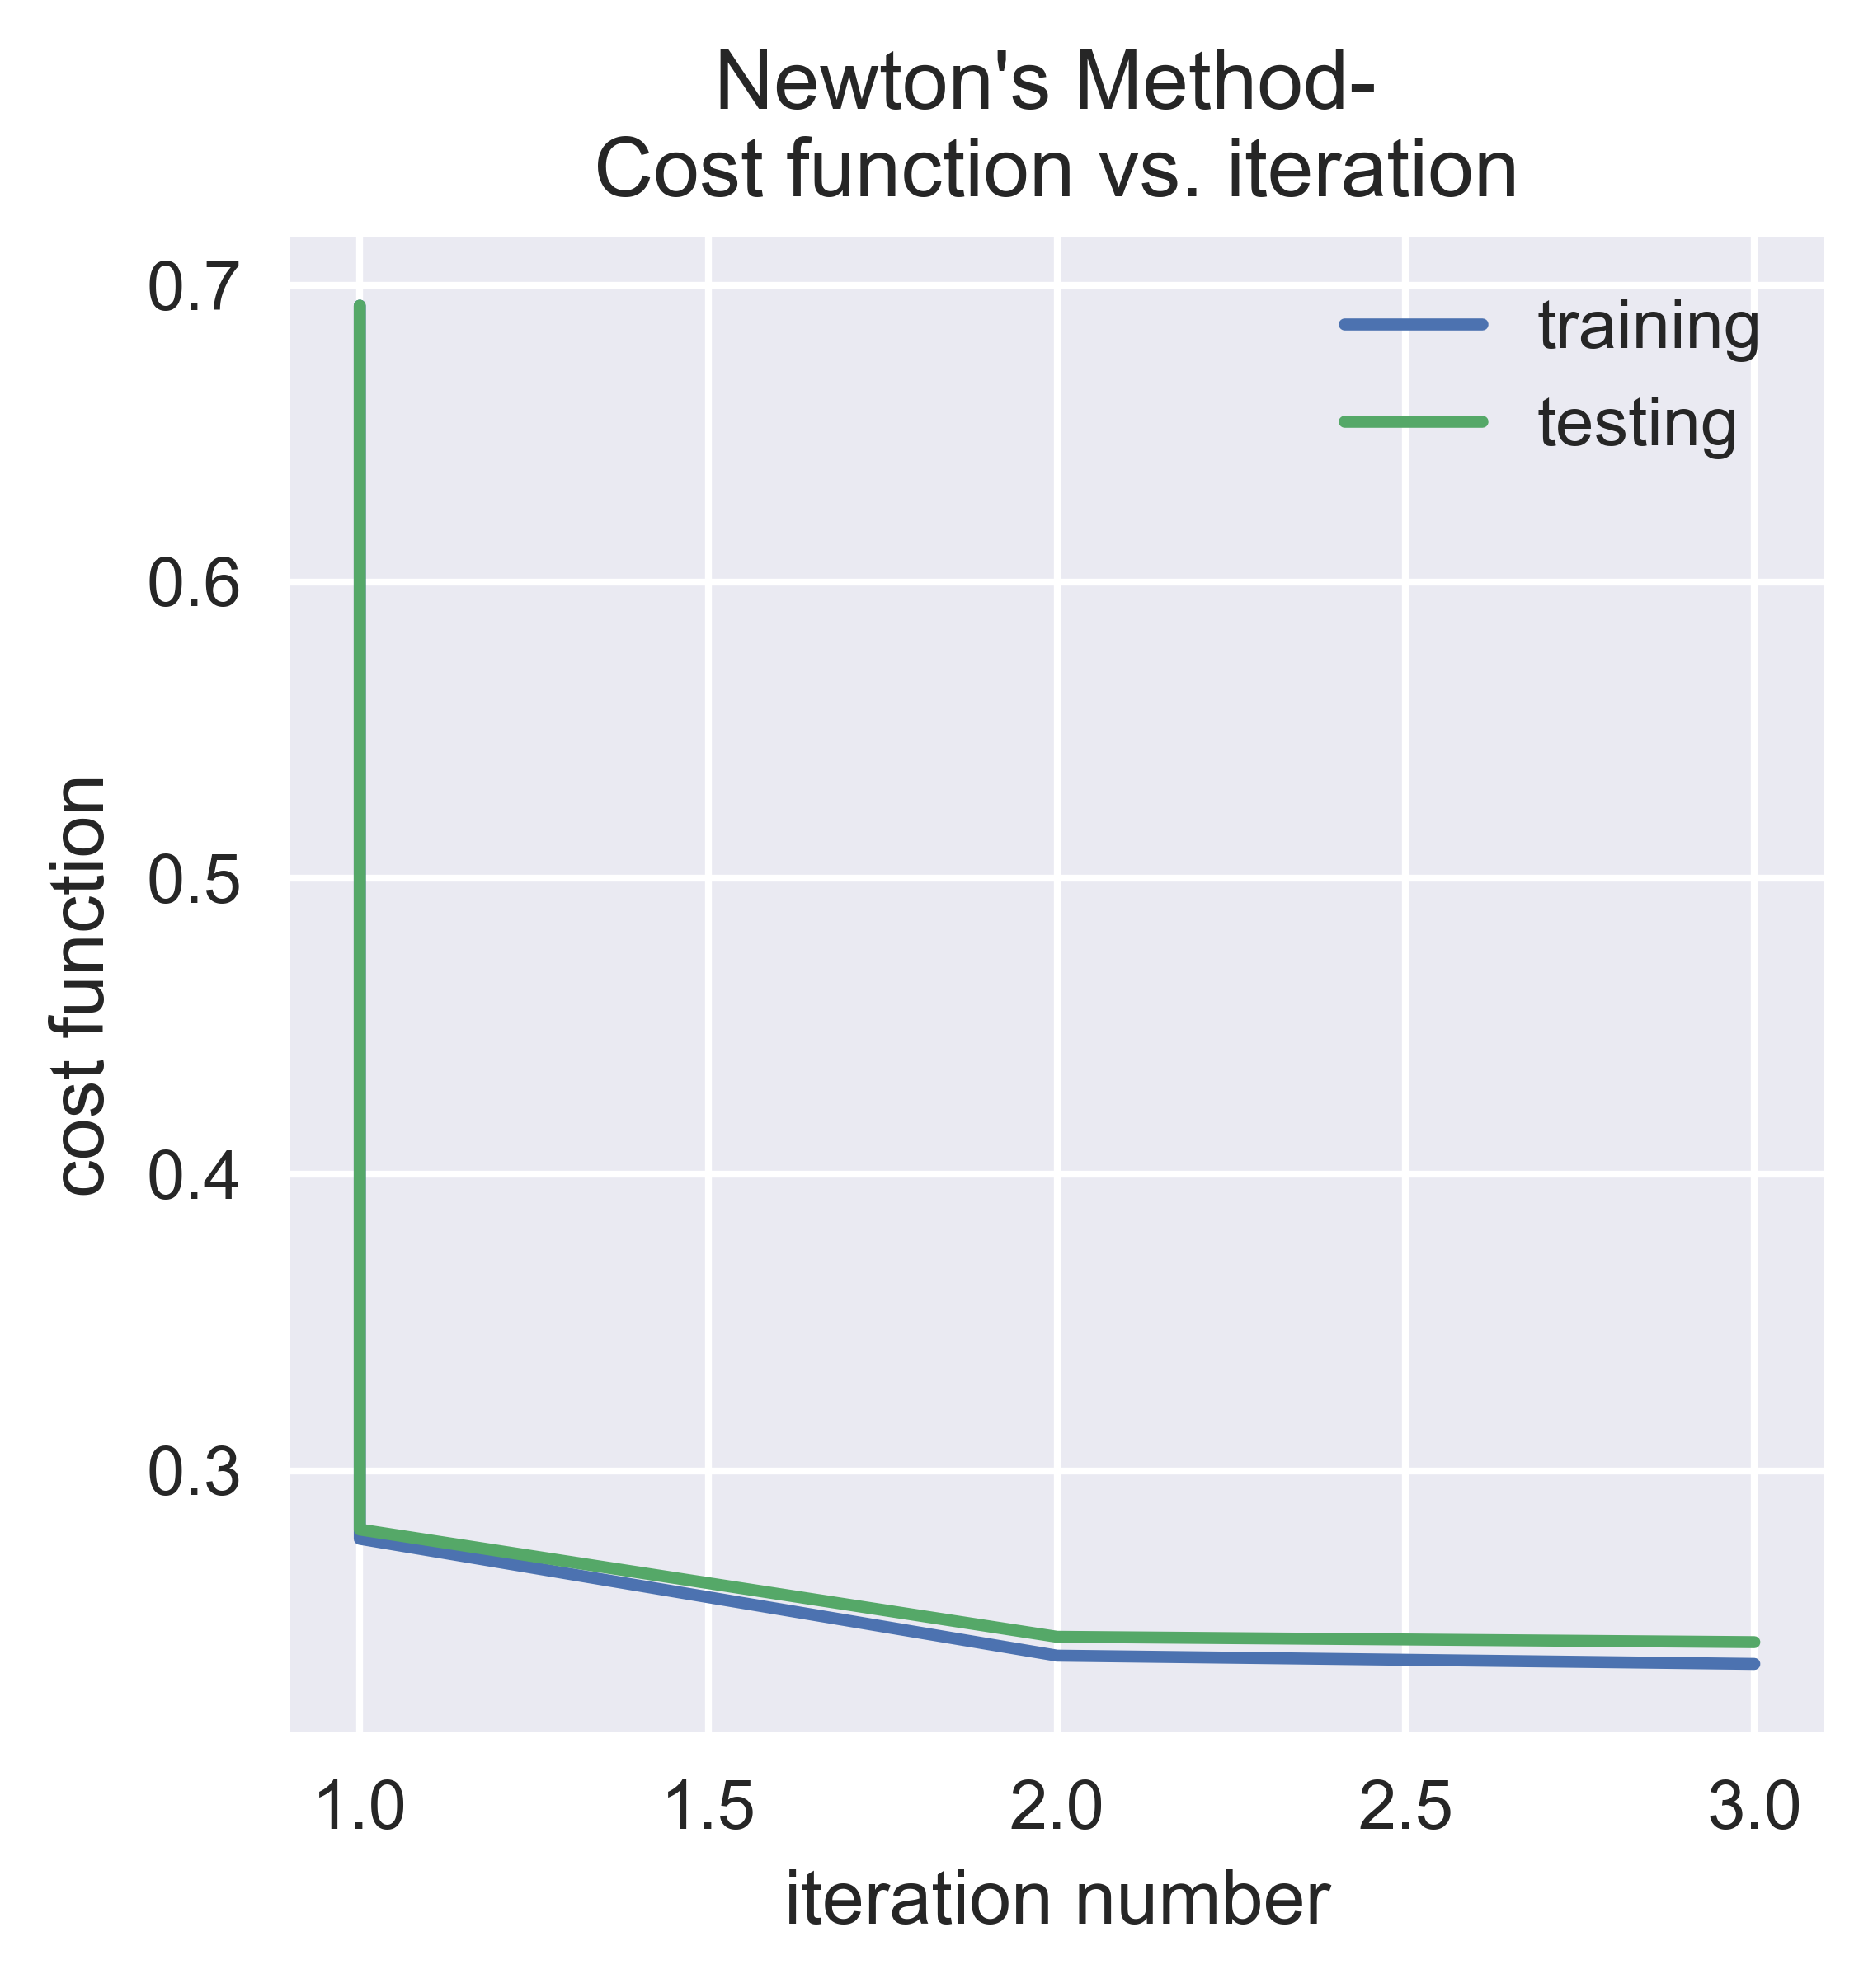

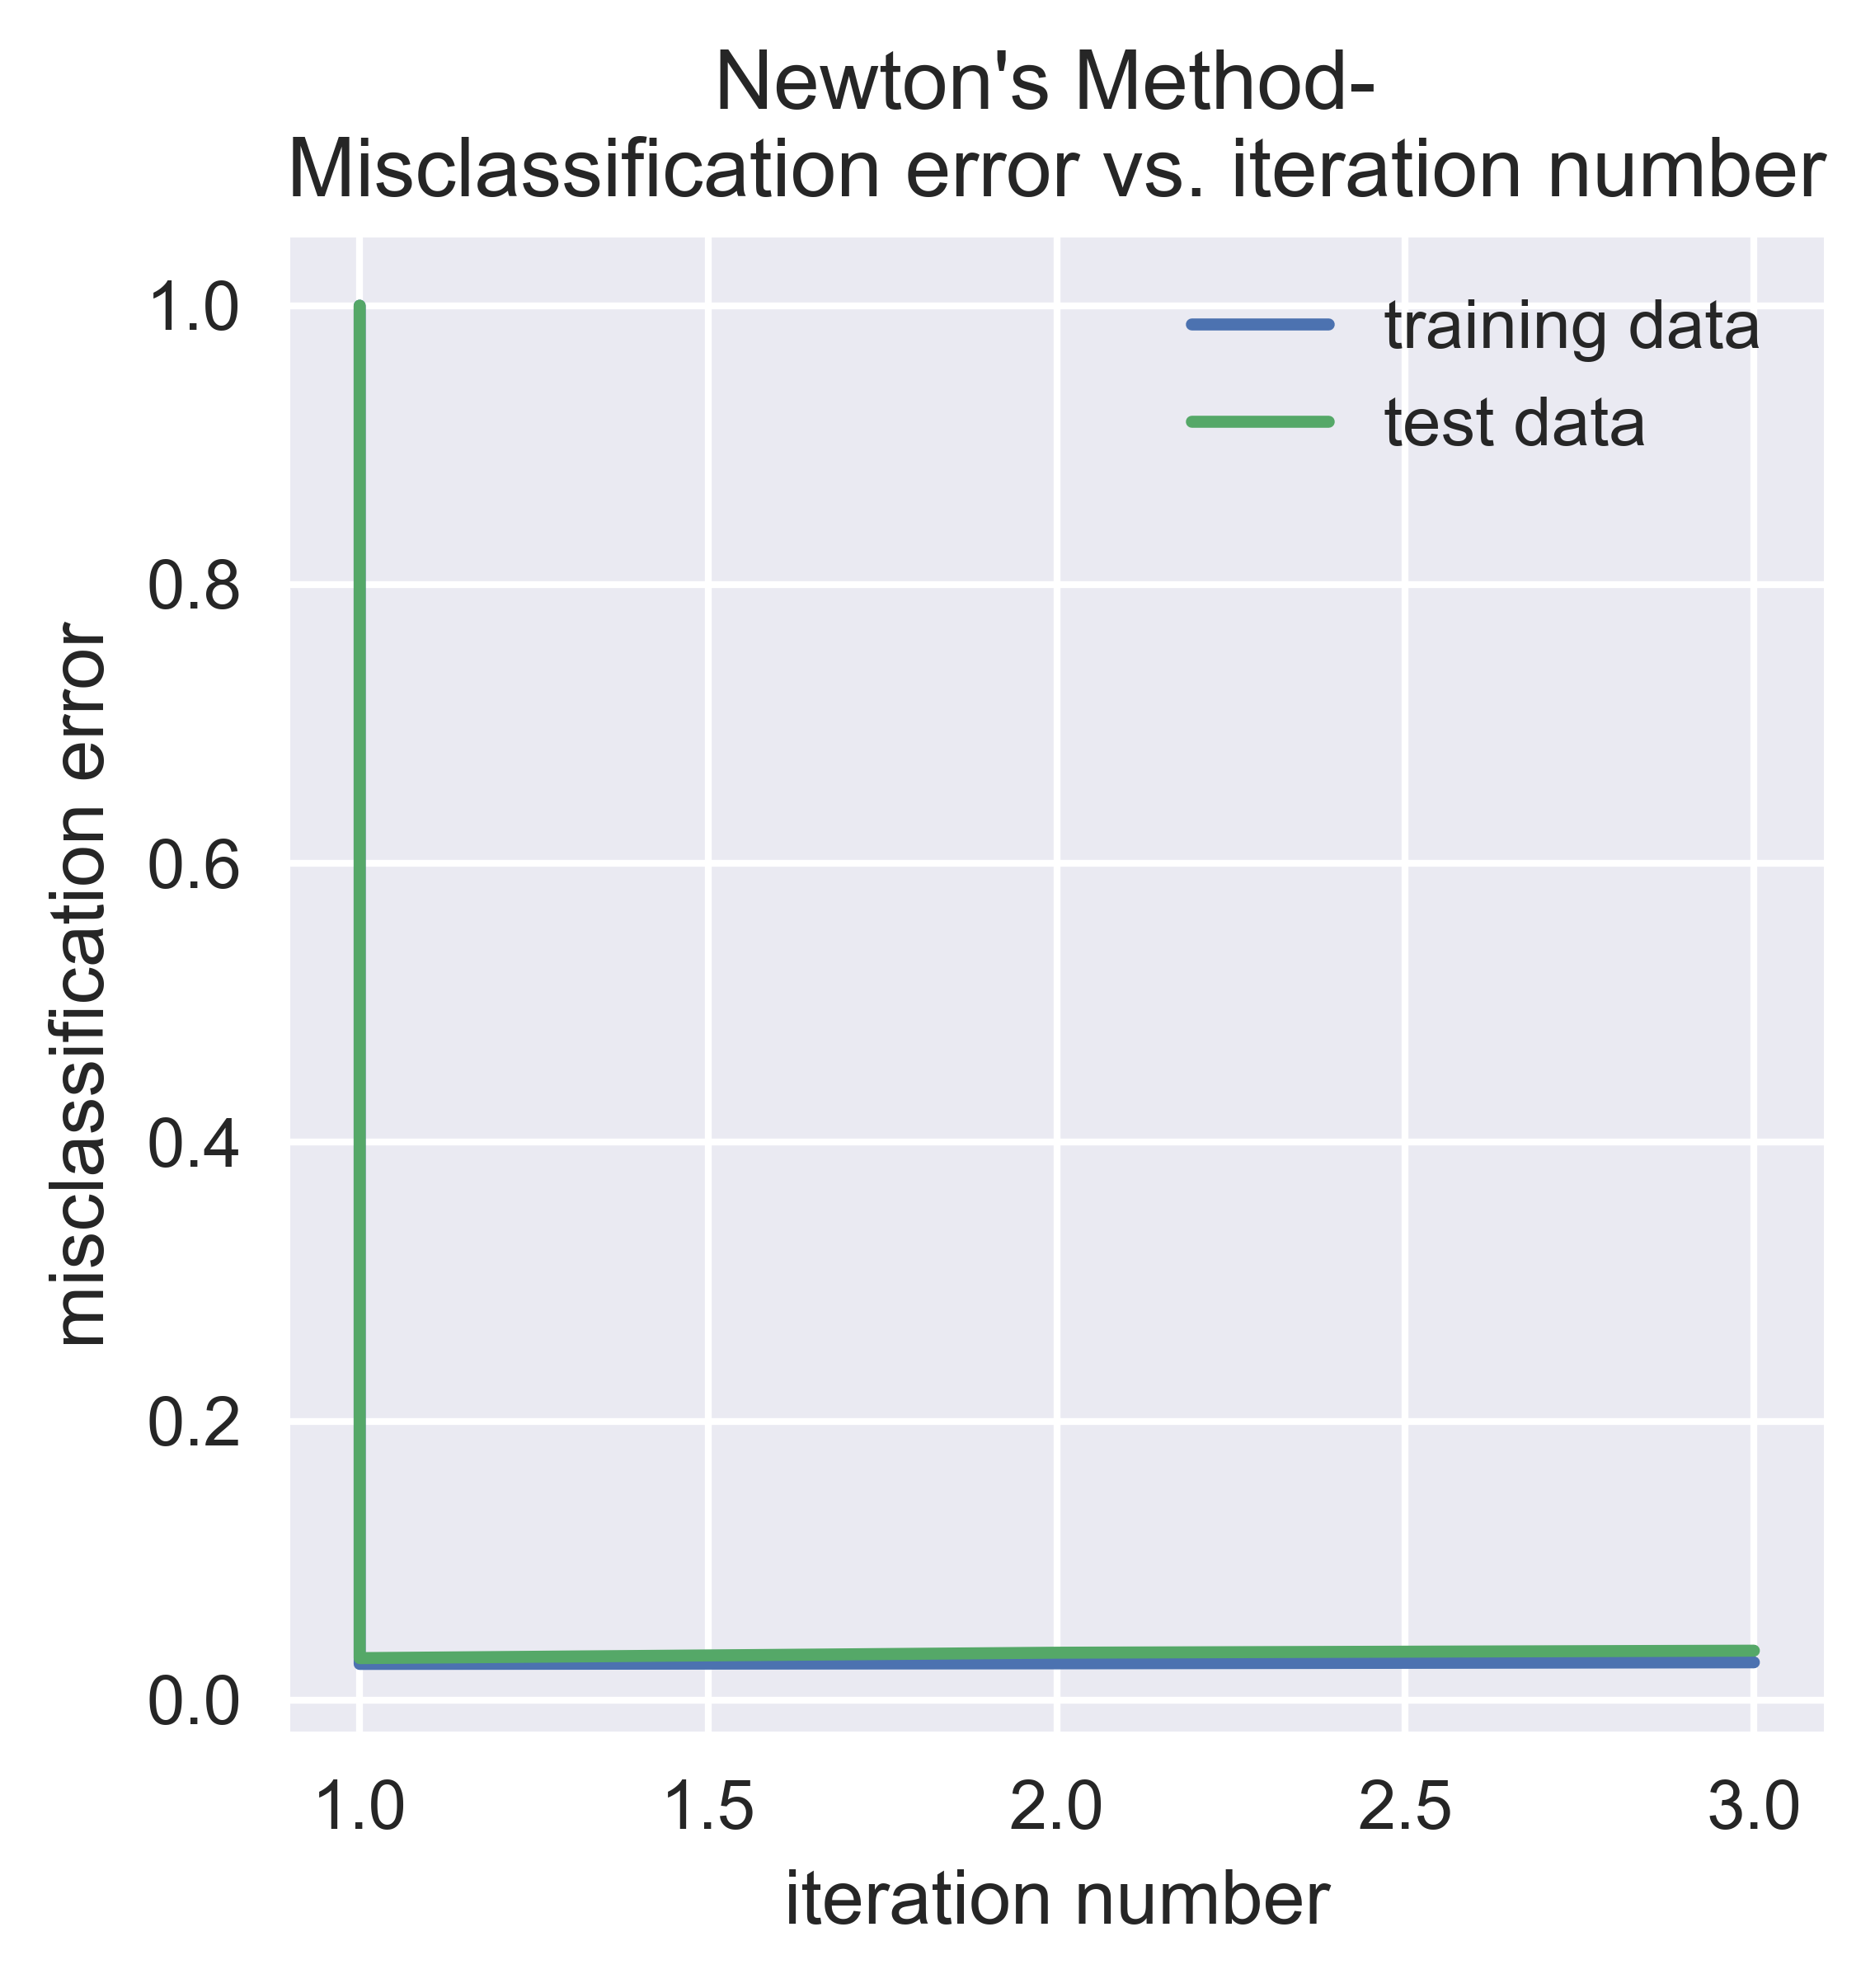

In [49]:
plot_objective_train_test(k_vec,j_train_vec,j_test_vec,train_classify_vec,test_classify_vec,'Newton\'s Method- \n')

### batch

### this is scratch below here

In [ ]:
X = x_train_c
y = labels_train_c
X_test = x_test_c
y_test = labels_test_c

not_conv = True
j_train_vec = []
j_test_vec = []
w_vec = []
b_vec = []
k_vec = []
train_classify_vec = []
test_classify_vec = []

k = 0
#step_size = 1e-3
step_size = 5e-2
criteria_conv = 2e-4

w = np.zeros((np.shape(X)[1],))
b = 0
n = np.shape(X)[0]
#mu_vec = np.zeros((np.shape(X)[0],))
#cost_mu = np.zeros((np.shape(X)[0],))
#range_vec = np.arange(len(mu_vec))
j_prev = 0

while not_conv:
    ##### training part 
    #mu_vec = [1/(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    #cost_mu = [(1+np.exp(-y[i]*(b+np.dot(X[i,:].T,w)))) for i in range_vec]
    mu_vec = 1/(1+np.exp(-y.T*(b+np.dot(X,w)))) 
    cost_mu = 1+np.exp(-y.T*(b+np.dot(X,w)))
     
    #g_w = (1/n)*np.dot(X.T,(mu_vec - y)) + 2*lambda_val*w
    #g_b = (1/n)*np.sum(mu_vec-y)
    
    g_w = (1/n)*(np.dot(X.T,(-y*(1-mu_vec)))) + 2*lambda_val*w
    g_b = (1/n)*np.sum(-y*(1-mu_vec))
    
    j_train = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)
    ####### testing part
    
    mu_vec = 1/(1+np.exp(-y_test.T*(b+np.dot(X_test,w)))) 
    cost_mu = 1+np.exp(-y_test.T*(b+np.dot(X_test,w)))
    
    j_test = (1/n)*(np.sum(np.log(cost_mu))) + lambda_val*np.dot(w.T,w)

    # 
    w_new = w - step_size*g_w
    b_new = b - step_size*g_b
    
    w_vec.append(w)
    b_vec.append(b)

    delta_w = np.abs(w-w_old)
    delta_b = np.abs(b-b_old)

    #w = np.array(w)
    w = copy.copy(w_new)
    b = copy.copy(b_new)

    k_vec.append(k)
    j_train_vec.append(j_train)
    j_test_vec.append(j_test)
    
    #### classificaiton
    train_signed = (b+np.dot(X,w))
    test_signed = (b+np.dot(X_test,w))

    train_data_class = np.sign(train_signed)
    test_data_class = np.sign(test_signed)

    train_classify_error_vec = [train_data_class != y]
    test_classify_error_vec = [test_data_class != y_test]
    
    train_classify_error = np.sum(train_classify_error_vec)/n
    test_classify_error = np.sum(test_classify_error_vec)/n
    
    train_classify_vec.append(train_classify_error)
    test_classify_vec.append(test_classify_error)
    
    # check convergence
    if ((1/n)*np.sum(delta_w))<criteria_conv and k>1:
        not_conv = False

    else:
        not_conv = True
        k += 1

    print('the value of j train is {}'.format(j_train))

    #print('the value of delta_w is {}'.format(delta_w))
    #print(mu_vec)
    #print(not_conv)


In [ ]:
plt.figure()
plt.plot(k_vec,j_train_vec,label='training')
plt.plot(k_vec,j_test_vec,label='testing')
plt.xlabel('iteration number')
plt.ylabel('cost function')
plt.title('Cost function vs. iteration')
plt.legend()
index = np.argmin(j_train_vec)
k_best = k_vec[index]
w_best = w_vec[index]


plt.figure()
plt.plot(k_vec,train_classify_vec,label='training data')
plt.plot(k_vec,test_classify_vec,label='test data')
plt.xlabel('iteration number')
plt.ylabel('misclassification error')
plt.title('Misclassification error vs. iteration number')
plt.legend()


In [ ]:
np.diag([1,2,3])

In [37]:
a= [1,2,3,4,5]

In [44]:
a[:-2]

[1, 2, 3]

In [68]:
?np.random.choice

In [89]:
a = [1,2,3,4,5,6,7]
i = 1
batch_size = 4

In [90]:
a[i:i+batch_size]

[2, 3, 4, 5]